In [1]:
# Reading the standardized catalog TGAS/Wright/2MASS
Don2 <-read.csv("/Users/joncouri/Git_GAIA/GAIA/Work-Areas/ijoncour/StandCat/Tgas200_Wright2003_2MASS_FinCat_out.csv")

In [3]:
# Selection based  on Spectal type
Dat <-Don2
Typ <- as.character(Dat$SpType)

In [20]:
# Retrieve class luminosity groups 

test_4_5a <- grep("IV/V" , Typ)
 test_4_5b <- grep("IV-V" , Typ)
 test_3_4a <- grep("III/IV", Typ)
 test_3_4b <- grep("III-IV", Typ)
 test_2_3a <- grep("II/III", Typ)
 test_2_3b <- grep("II-III", Typ)
 test_1_2a <- grep("I/II", Typ)
 test_1_2b <- grep("I-II", Typ)
 
 test_1_2 <-  c(test_1_2a,test_1_2b)
 test_2_3 <-  c(test_2_3a,test_2_3b)
 test_3_4 <-  c(test_3_4a,test_3_4b)
 test_4_5 <-  c(test_4_5a,test_4_5b)
 
 
 IndL <- seq(1,length(Typ))[-c(test_1_2,test_2_3,test_3_4,test_4_5)]
 test_4_0 <- IndL[grep("IV",Typ[IndL])]
 IndL <- seq(1,length(Typ))[-c(test_1_2,test_2_3,test_3_4,test_4_5,test_4_0)]
 test_5_0 <- IndL[grep("V",Typ[IndL])]
 IndL <- seq(1,length(Typ))[-c(test_1_2,test_2_3,test_3_4,test_4_5,test_4_0,test_5_0)]
 test_3_0 <- IndL[grep("III",Typ[IndL])]
 IndL <- seq(1,length(Typ))[-c(test_1_2,test_2_3,test_3_4,test_4_5,test_4_0,test_5_0, test_3_0)]
 test_2_0 <- IndL[grep("II",Typ[IndL])]
 IndL <- seq(1,length(Typ))[-c(test_1_2,test_2_3,test_3_4,test_4_5,test_4_0,test_5_0, test_3_0,test_2_0)]
 test_1_0 <- IndL[grep("I",Typ[IndL])]
 
 Typ_Nb <- rep(NA,length(Dat))
 Typ_Nb[test_1_0] <-1
 Typ_Nb[test_1_2] <-1.5
 Typ_Nb[test_2_0] <-2
 Typ_Nb[test_2_3] <-2.5
 Typ_Nb[test_3_0] <-3
 Typ_Nb[test_3_4] <-3.5
 Typ_Nb[test_4_0] <-4
 Typ_Nb[test_4_5] <-4.5
 Typ_Nb[test_5_0] <-5
 
 Ind_LumCl_1.5 <-test_1_2
 Ind_LumCl_2.5 <-test_2_3
 Ind_LumCl_3.5 <-test_3_4
 Ind_LumCl_4.5 <-test_4_5
 
 Ind_LumCl_1.0 <-test_1_0
 Ind_LumCl_2.0 <-test_2_0
 Ind_LumCl_3.0 <-test_3_0
 Ind_LumCl_4.0 <-test_4_0
 Ind_LumCl_5.0 <-test_5_0

length(Dat$Teff)

# Number of Wright "pure" luminosity class sources : 25207

Nb_Class_1.0 <- length(Ind_LumCl_1.0)  # 34  sources Class I
Nb_Class_2.0 <- length(Ind_LumCl_2.0)  # 142   sources Class II
Nb_Class_3.0 <-length(Ind_LumCl_3.0)   # 3025   sources Class III
Nb_Class_4.0 <-length(Ind_LumCl_4.0)    # 2008   sources Class VI
Nb_Class_5.0 <- length(Ind_LumCl_5.0)   # 19998   sources Class V

# Number of Wright "mixed" luminosity class  sources : 1904
Nb_Class_1.5 <-length(Ind_LumCl_1.5)   # 110  sources Class I/II
Nb_Class_2.5 <-length(Ind_LumCl_2.5)   # 110   sources Class II/III
Nb_Class_3.5 <-length(Ind_LumCl_3.5)   # 528   sources Class III/IV
Nb_Class_4.5 <-length(Ind_LumCl_4.5)   # 1156   sources Class IV/V



Nb_ClassInt <- length(Ind_LumCl_1.0)+ length(Ind_LumCl_2.0) + length(Ind_LumCl_3.0) +length(Ind_LumCl_4.0) +length(Ind_LumCl_5.0)
Nb_ClassNoInt <-  length(Ind_LumCl_1.5) + length(Ind_LumCl_2.5) + length(Ind_LumCl_3.5) + length(Ind_LumCl_4.5)


#Nb_Class_1.0;Nb_Class_2.0;Nb_Class_3.0;Nb_Class_4.0;Nb_Class_5.0
#Nb_Class_1.5;Nb_Class_2.5;Nb_Class_3.5;Nb_Class_4.5

#Nb_ClassInt; Nb_ClassNoInt

# Number of sources without a luminosity class attributed : 22982 (over 50093 sources of the catalog)
length(Dat$Teff) -Nb_ClassInt- Nb_ClassNoInt

[1] 50093

[1] 22982

In [30]:
# MY OWN FUNCTIONS FOR THE COLOR PLOTS

#--- Function to convert values to colors
#this function converts a vector of values("z") to a vector of color
#levels. One must define the number of colors. The limits of the color
#scale("zlim") or the break points for the color changes("breaks") can 
#also be defined. when breaks and zlim are defined, breaks overrides zlim.

val2col<-function(z, zlim, 
col = colfunc(12)
, breaks){
 if(!missing(breaks)){
  if(length(breaks) != (length(col)+1)){stop("must have one more break than colour")}
 }
 if(missing(breaks) & !missing(zlim)){
  zlim[2] <- zlim[2]+c(zlim[2]-zlim[1])*(1E-3)
  zlim[1] <- zlim[1]-c(zlim[2]-zlim[1])*(1E-3)
  breaks <- seq(zlim[1], zlim[2], length.out=(length(col)+1)) 
 }
 if(missing(breaks) & missing(zlim)){
  zlim <- range(z, na.rm=TRUE)
  zlim[2] <- zlim[2]+c(zlim[2]-zlim[1])*(1E-3)
  zlim[1] <- zlim[1]-c(zlim[2]-zlim[1])*(1E-3)
  breaks <- seq(zlim[1], zlim[2], length.out=(length(col)+1))
 }
 CUT <- cut(z, breaks=breaks)
 colorlevels <- col[match(CUT, levels(CUT))] 
 return(colorlevels)
}

# Function
color.bar <- function(lut, min, max=-min, nticks=11, ticks=seq(min, max, len=nticks), title='') {
    scale = (length(lut)-1)/(max-min)
    plot(c(0,10), c(min,max), type='n', bty='n', xaxt='n', xlab='', yaxt='n', ylab='', main=title)
    axis(4, ticks, las=1)
    for (i in 1:(length(lut)-1)) {
    	y = (i-1)/scale + min
    	rect(0,y,10,y+1/scale, col=lut[i], border=NA)
    }	
}



In [24]:
# Definition of the color function
colfunc<-colorRampPalette(c("red","yellow","springgreen","royalblue"))
#col = rainbow(24,  start = 0, end = 1, alpha = 1)
#col = colfunc(12)

In [26]:
# Absolute magnitude
Gabs <- Dat$X.Gmag.-5*log10(1/MyData$Plx*1000)+5
Vabs <- Dat$VTmag-5*log10(1/MyData$Plx*1000)+5
Babs <- Dat$BTmag-5*log10(1/MyData$Plx*1000)+5
Jabs <- Dat$Jmag-5*log10(1/MyData$Plx*1000)+5
Habs <- Dat$Hmag-5*log10(1/MyData$Plx*1000)+5
Kabs <- Dat$Kmag-5*log10(1/MyData$Plx*1000)+5



 num [1:50093] 4.93 3.19 1.43 2.19 1.87 ...


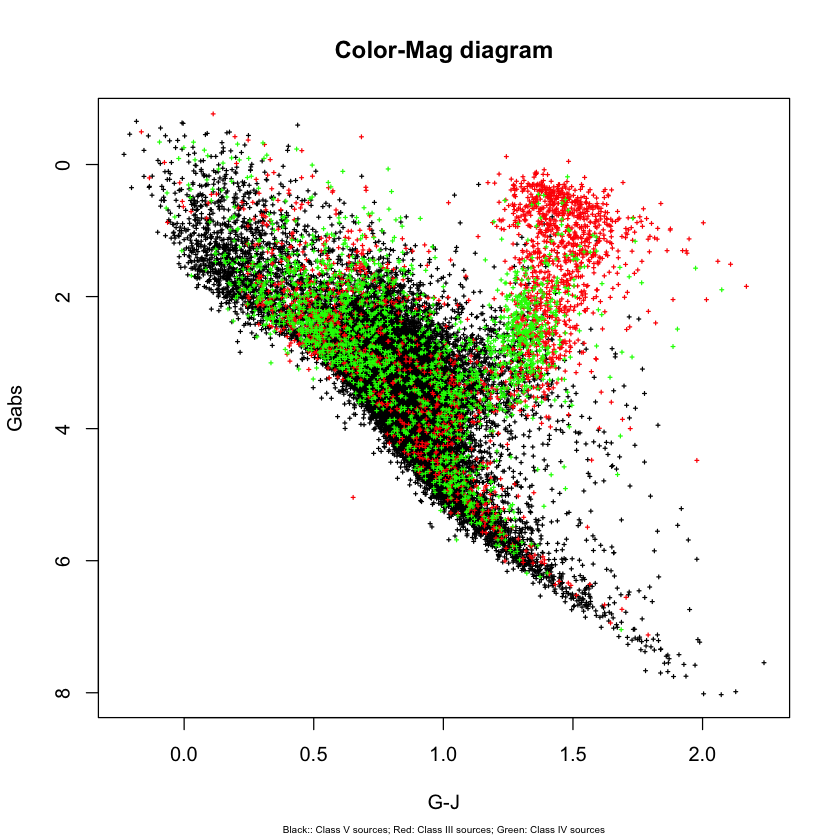

In [28]:
# Color-Magnitude diagram as a function of the luminosity class
plot(  Dat$X.Gmag.[Ind_LumCl_5.0]-Dat$Jmag[Ind_LumCl_5.0],Gabs[Ind_LumCl_5.0],ylim=c(max(Gabs[Ind_LumCl_5.0],na.rm =TRUE),min(Gabs[Ind_LumCl_5.0],na.rm =TRUE)),pch=3, cex=0.3, xlab="G-J", ylab="Gabs", main="Color-Mag diagram", sub="Black:: Class V sources; Red: Class III sources; Green: Class IV sources", cex.sub=0.5)
points( Dat$X.Gmag.[Ind_LumCl_3.0]-Dat$Jmag[Ind_LumCl_3.0],Gabs[Ind_LumCl_3.0],pch=3, cex=0.3, col="red")
 points( Dat$X.Gmag.[Ind_LumCl_4.0]-Dat$Jmag[Ind_LumCl_4.0],Gabs[Ind_LumCl_4.0],pch=3, cex=0.3, col="green")


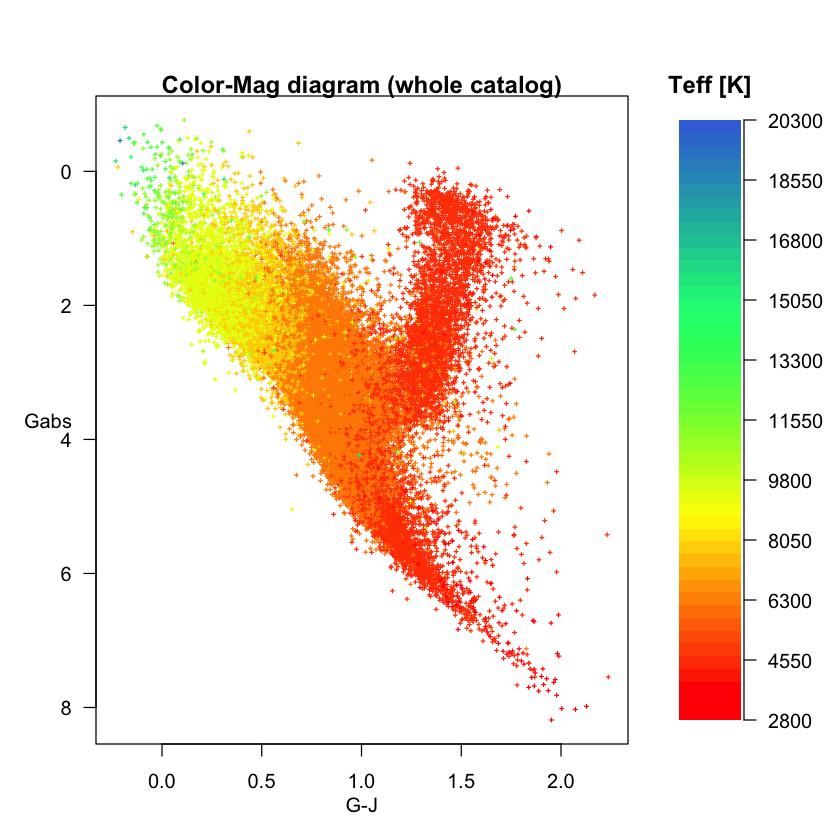

In [33]:
col3_Teff <- val2col (Dat$Teff)
mytitle <- "Teff [K]"
mymin <- min(Dat$Teff)
mymax <- max(Dat$Teff)
mycol <- col3_Teff 

#col3_KG <- val2col (Dat$Kmag-Dat$Hmag)
#mytitle <- "K-H"
#mymin <- min(Dat$Kmag-Dat$Hmag, na.rm=TRUE)
#mymax <- max(Dat$Kmag-Dat$Hmag, na.rm=TRUE)
#mycol <- col3_KG

layout(t(1:2), widths=c(5,1))
par(mar=rep(1, 4), oma=rep(3, 4), las=1)

plot(  Dat$X.Gmag.-Dat$Jmag,Gabs,ylim=c(max(Gabs,na.rm =TRUE),min(Gabs,na.rm =TRUE)),pch=3, cex=0.3, 
     xlab="G-J", ylab="Gabs", main="Color-Mag diagram (whole catalog)", cex.sub=0.5,col=mycol)

mtext(text="G-J",side=1,line=2)
mtext(text="Gabs", side=2,line=1, adj=1)
color.bar(colfunc(48), min=mymin,max=mymax, title =mytitle)



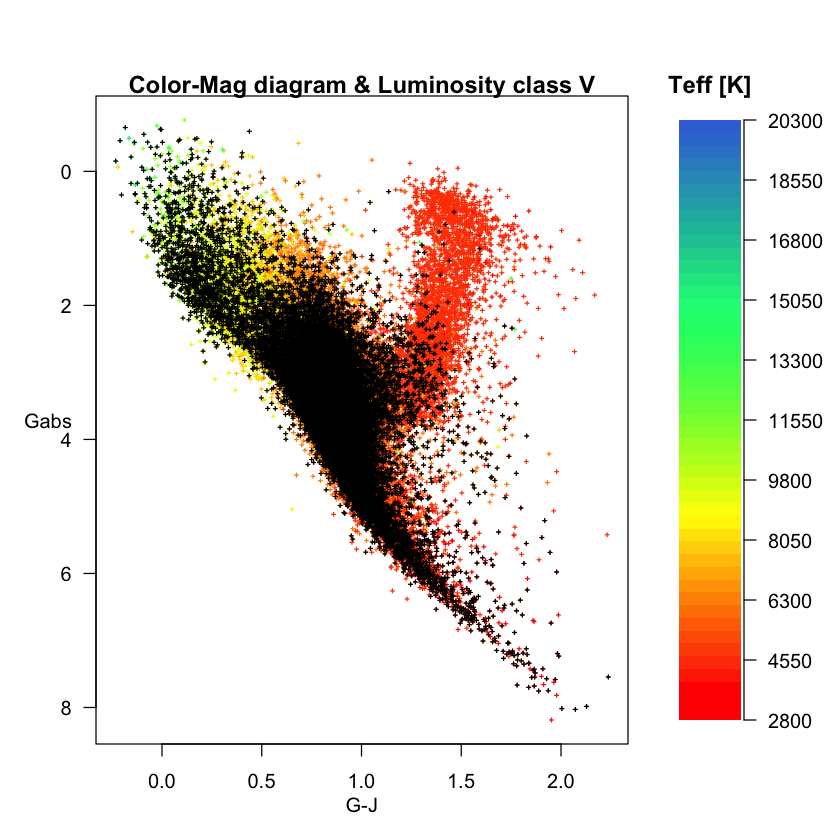

In [138]:
col3_Teff <- val2col (Dat$Teff)
mytitle <- "Teff [K]"
mymin <- min(Dat$Teff)
mymax <- max(Dat$Teff)
mycol <- col3_Teff 

#col3_KG <- val2col (Dat$Kmag-Dat$Hmag)
#mytitle <- "K-H"
#mymin <- min(Dat$Kmag-Dat$Hmag, na.rm=TRUE)
#mymax <- max(Dat$Kmag-Dat$Hmag, na.rm=TRUE)
#mycol <- col3_KG

layout(t(1:2), widths=c(5,1))
par(mar=rep(1, 4), oma=rep(3, 4), las=1)

plot(  Dat$X.Gmag.-Dat$Jmag,Gabs,ylim=c(max(Gabs,na.rm =TRUE),min(Gabs,na.rm =TRUE)),pch=3, cex=0.3, xlab="G-J", 
     ylab="Gabs", main="Color-Mag diagram & Luminosity class V (Black)", cex.sub=0.5,col=mycol, sub="Black: Class V Sources")
points(  Dat$X.Gmag.[Ind_LumCl_5.0]-Dat$Jmag[Ind_LumCl_5.0],Gabs[Ind_LumCl_5.0],ylim=c(max(Gabs[Ind_LumCl_5.0],
    na.rm =TRUE),min(Gabs[Ind_LumCl_5.0],na.rm =TRUE)),pch=3, cex=0.3, xlab="G-J", ylab="Gabs")

mtext(text="G-J",side=1,line=2)
mtext(text="Gabs", side=2,line=1, adj=1)
color.bar(colfunc(48), min=mymin,max=mymax, title =mytitle)



In [ ]:
col3_Teff <- val2col (Dat$Teff)
mytitle <- "Teff [K]"
mymin <- min(Dat$Teff)
mymax <- max(Dat$Teff)
mycol <- col3_Teff 

#col3_KG <- val2col (Dat$Kmag-Dat$Hmag)
#mytitle <- "K-H"
#mymin <- min(Dat$Kmag-Dat$Hmag, na.rm=TRUE)
#mymax <- max(Dat$Kmag-Dat$Hmag, na.rm=TRUE)
#mycol <- col3_KG

layout(t(1:2), widths=c(5,1))
par(mar=rep(1, 4), oma=rep(3, 4), las=1)

plot(  Dat$X.Gmag.-Dat$Jmag,Gabs,ylim=c(max(Gabs,na.rm =TRUE),min(Gabs,na.rm =TRUE)),pch=3, cex=0.3, xlab="G-J", 
     ylab="Gabs", main="Color-Mag diagram (Whole catalog)", cex.sub=0.5,col=mycol)
points(  Dat$X.Gmag.[Ind_LumCl_3.0]-Dat$Jmag[Ind_LumCl_3.0],Gabs[Ind_LumCl_3.0],ylim=c(max(Gabs[Ind_LumCl_3.0],
    na.rm =TRUE),min(Gabs[Ind_LumCl_3.0],na.rm =TRUE)),pch=3, cex=0.3, xlab="G-J", ylab="Gabs", col="purple")

mtext(text="G-J",side=1,line=2)
mtext(text="Gabs", side=2,line=1, adj=1)
color.bar(colfunc(48), min=mymin,max=mymax, title =mytitle)



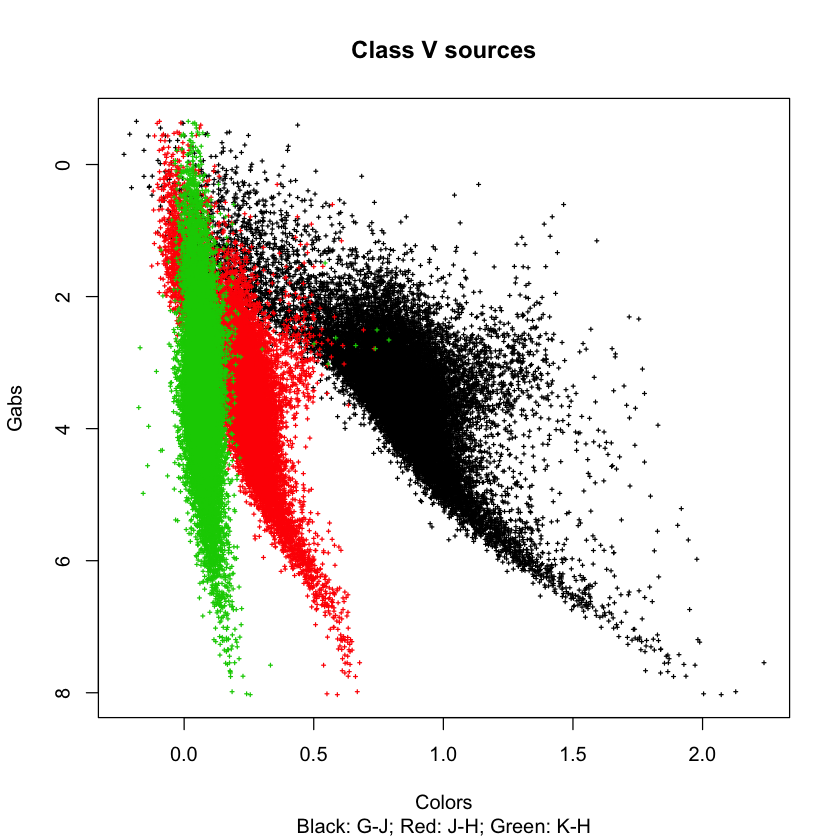

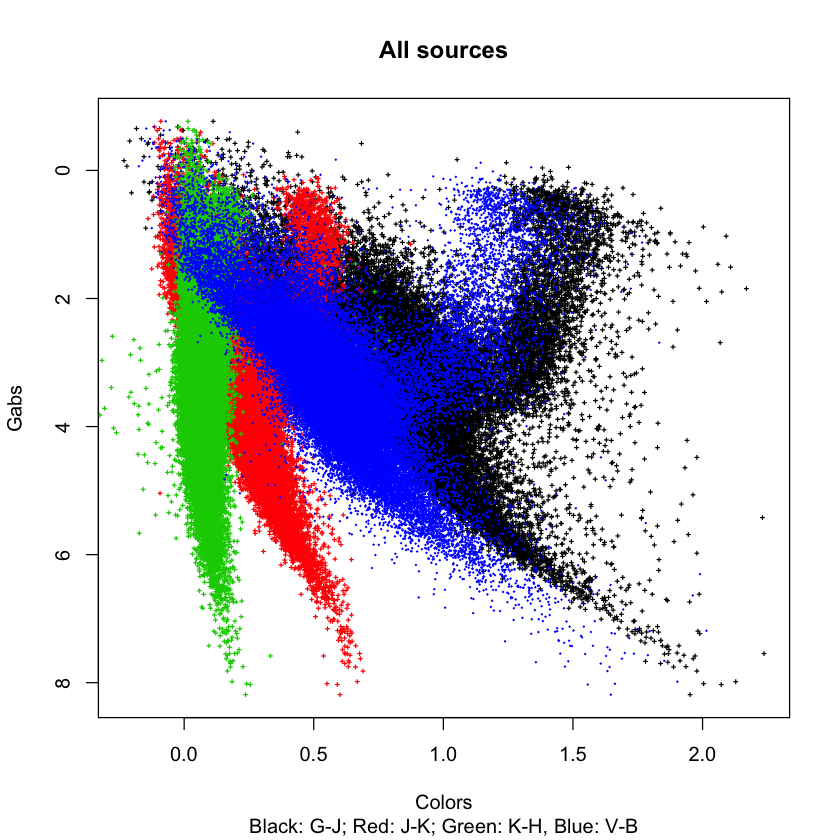

In [143]:
#Plot magnitude abs. Gabs versus colors G-J, J-H, K-H

plot(  Dat$X.Gmag.[Ind_LumCl_5.0]-Dat$Jmag[Ind_LumCl_5.0],Gabs[Ind_LumCl_5.0],ylim=c(max(Gabs[Ind_LumCl_5.0],na.rm =TRUE),min(Gabs[Ind_LumCl_5.0],na.rm =TRUE)),pch=3, cex=0.3, xlab="Colors", ylab="Gabs", col=1, main="Class V sources", sub="Black: G-J; Red: J-H; Green: K-H")
points(  Dat$Jmag[Ind_LumCl_5.0]-Dat$Hmag[Ind_LumCl_5.0],Gabs[Ind_LumCl_5.0],ylim=c(max(Gabs[Ind_LumCl_5.0],na.rm =TRUE),min(Gabs[Ind_LumCl_5.0],na.rm =TRUE)),pch=3, cex=0.3, xlab="G-J", ylab="Gabs", col=2)
points(  Dat$Hmag[Ind_LumCl_5.0]-Dat$Kmag[Ind_LumCl_5.0],Gabs[Ind_LumCl_5.0],ylim=c(max(Gabs[Ind_LumCl_5.0],na.rm =TRUE),min(Gabs[Ind_LumCl_5.0],na.rm =TRUE)),pch=3, cex=0.3, xlab="G-J", ylab="Gabs", col=3)


plot(  Dat$X.Gmag.-Dat$Jmag,Gabs,ylim=c(max(Gabs,na.rm =TRUE),min(Gabs,na.rm =TRUE)),pch=3, cex=0.3, 
     xlab="Colors", ylab="Gabs", col=1, main="All sources", sub="Black: G-J; Red: J-K; Green: K-H, Blue: V-B")
points(  Dat$Jmag-Dat$Hmag,Gabs,ylim=c(max(Gabs,na.rm =TRUE),min(Gabs,na.rm =TRUE)),pch=3, cex=0.3, 
       xlab="G-J", ylab="Gabs", col=2)
points(  Dat$Hmag-Dat$Kmag,Gabs,ylim=c(max(Gabs,na.rm =TRUE),min(Gabs,na.rm =TRUE)),pch=3, cex=0.3, 
       xlab="G-J", ylab="Gabs", col=3)
points(  Dat$BTmag-Dat$VTmag,Gabs,ylim=c(max(Gabs,na.rm =TRUE),min(Gabs,na.rm =TRUE)),pch=3, cex=0.1, 
       xlab="G-J", ylab="Gabs", col=4)



In [35]:
# Zero-Point of filters in Jansky
G_ZP <- 2861.3 # GAIA
B_ZP <- 3894.3 # Tycho
V_ZP <-3653.9  # Tycho
J_ZP <-1594.0 # 2MASS
H_ZP <-1024.0  # 2MASS
K_ZP <- 666.8 # 2MASS

# Effective wavelength (Angstroms) of the filters

BT_Leff <- 4280.0 # Tycho
VT_Leff <-5340.0 # Tycho
G_Leff <- 5857.6 # GAIA
J_Leff <-12350 # 2MASS
H_Leff <-16620 # 2MASS
K_Leff <-21590 # 2MASS

Ang_um <- 10**(-4)
unit <-Ang_um 
Leff <- c(K_Leff*unit,H_Leff*unit,J_Leff*unit,G_Leff*unit,VT_Leff*unit,BT_Leff*unit) # Leff in Micro-metres


In [42]:
#SED for Class V sources
Dat_5.0 <-Dat[Ind_LumCl_5.0,]

# 
Gabs_5.0 <- Dat_5.0$X.Gmag.-5*log10(1/Dat_5.0$Plx*1000)+5
Vabs_5.0 <- Dat_5.0$VTmag-5*log10(1/Dat_5.0$Plx*1000)+5
Babs_5.0 <- Dat_5.0$BTmag-5*log10(1/Dat_5.0$Plx*1000)+5
Jabs_5.0 <- Dat_5.0$Jmag-5*log10(1/Dat_5.0$Plx*1000)+5
Habs_5.0 <- Dat_5.0$Hmag-5*log10(1/Dat_5.0$Plx*1000)+5
Kabs_5.0 <- Dat_5.0$Kmag-5*log10(1/Dat_5.0$Plx*1000)+5

#The  magnitude system has been quantified as follows: 
#m=-2.5 log10(f/Q where f is the mean spectral flux density 
#from a source at the top of the Earth’s atmosphere averaged over a defined band 
#and Q is a normalizing constant for that band. 

# Absolute Flux
Gabs_5.0_Fl <- (10**(Gabs_5.0/(-2.5)))*G_ZP
Babs_5.0_Fl <- (10**(Babs_5.0/(-2.5)))*B_ZP
Vabs_5.0_Fl <-(10**(Vabs_5.0/(-2.5)))*V_ZP
Jabs_5.0_Fl <-(10**(Jabs_5.0/(-2.5)))*J_ZP
Habs_5.0_Fl <-(10**(Habs_5.0/(-2.5)))*H_ZP
Kabs_5.0_Fl <-(10**(Kabs_5.0/(-2.5)))*K_ZP




   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3470    5860    6440    6555    6890   18700 

$breaks
 [1]  3000  3500  4000  4500  5000  5500  6000  6500  7000  7500  8000  8500
[13]  9000  9500 10000 10500 11000 11500 12000 12500 13000 13500 14000 14500
[25] 15000 15500 16000 16500 17000 17500 18000 18500 19000

$counts
 [1]    1   12   78  263  469 4564 8441 3054  890  633  188  544  269  348  178
[16]    0    0   40    0   13    0    4    0    0    6    0    0    0    0    0
[31]    0    3

$density
 [1] 1.000100e-07 1.200120e-06 7.800780e-06 2.630263e-05 4.690469e-05
 [6] 4.564456e-04 8.441844e-04 3.054305e-04 8.900890e-05 6.330633e-05
[11] 1.880188e-05 5.440544e-05 2.690269e-05 3.480348e-05 1.780178e-05
[16] 0.000000e+00 0.000000e+00 4.000400e-06 0.000000e+00 1.300130e-06
[21] 0.000000e+00 4.000400e-07 0.000000e+00 0.000000e+00 6.000600e-07
[26] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[31] 0.000000e+00 3.000300e-07

$mids
 [1]  3250  3750  4250  4750  5250  5750  6250  6750  7250  7750  8250  8750
[13]  9250  9750 10250 10750 11250 11750 12250 127

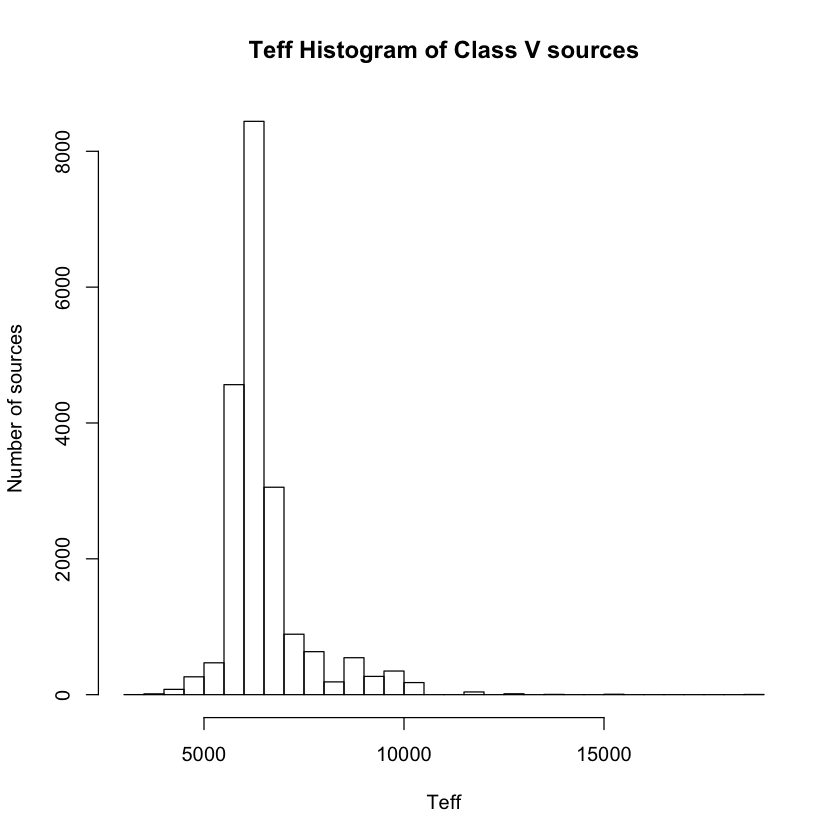

In [118]:
histTeff <- hist(Dat_5.0$Teff,n=17*2,main="Teff Histogram of Class V sources", xlab="Teff", ylab="Number of sources")
summary(Dat_5.0$Teff)
histTeff

In [164]:
# Creating groups in Effective temperature

Cut_Teff <- cut(Dat_5.0$Teff,breaks=seq(4000,10500,500))
Cut_Teff_num <- as.numeric(Cut_Teff )

Nb_cut_Teff <- vector(length=max(Cut_Teff_num, na.rm=TRUE))
Mean_cut_Teff  <- vector(length=max(Cut_Teff_num, na.rm=TRUE))
Min_cut_Teff  <- vector(length=max(Cut_Teff_num, na.rm=TRUE))
Max_cut_Teff  <- vector(length=max(Cut_Teff_num, na.rm=TRUE))

for (icut in 1:max(Cut_Teff_num, na.rm=TRUE)){
Ind_icut <- which(Cut_Teff_num==icut)
Nb_cut_Teff[icut] <- length(Ind_icut)
Mean_cut_Teff[icut]    <-floor(mean(Dat_5.0$Teff[Ind_icut], na.rm=TRUE))
Min_cut_Teff[icut]    <-floor(min(Dat_5.0$Teff[Ind_icut], na.rm=TRUE))
Max_cut_Teff[icut]    <-floor(max(Dat_5.0$Teff[Ind_icut], na.rm=TRUE))
}
# Number of sources in each groups
Nb_cut_Teff
Mean_cut_Teff
Min_cut_Teff
Max_cut_Teff

[1]   78  263  469 4564 8441 3054  890  633  188  544  269  348  178

[1]  4254  4790  5191  5787  6315  6889  7200  7850  8200  8825  9230  9520
[13] 10500

[1]  4060  4590  5080  5570  6030  6870  7200  7850  8200  8720  9230  9520
[13] 10500

[1]  4420  4900  5250  5860  6440  6890  7200  7850  8200  8970  9230  9520
[13] 10500

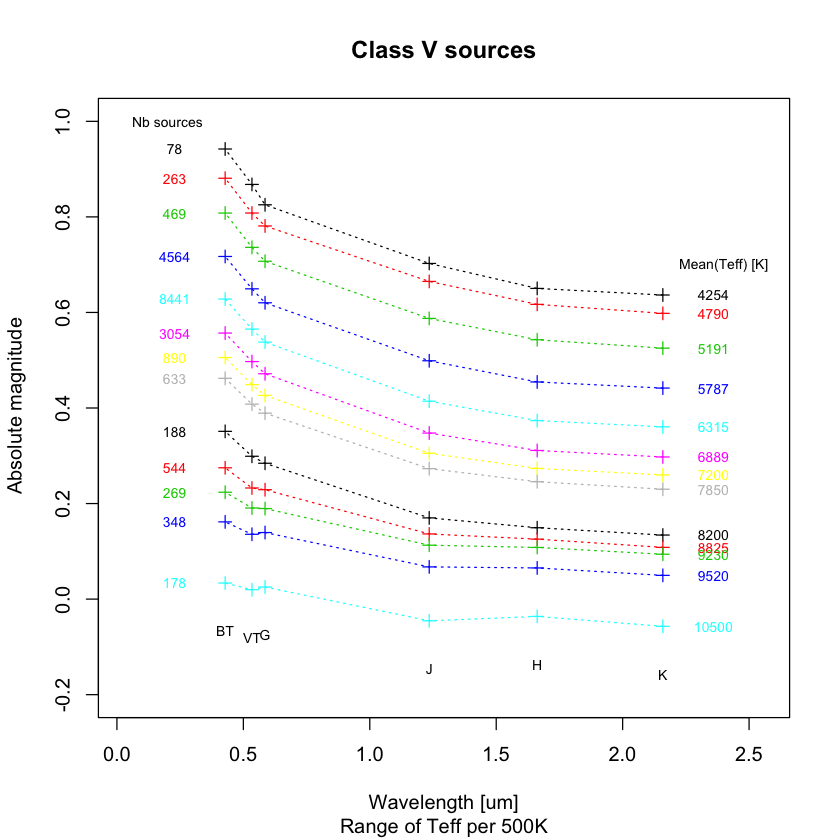

In [130]:
# Plot of the absolute SED based on magnitude 

icut <-3
Ind_icut <- which(Cut_Teff_num==icut)

xmin <- BT_Leff*unit
xmax <- K_Leff*unit
plot(rep(K_Leff,length(Ind_icut)),Dat_5.0$Hmag[Ind_icut ]-Dat_5.0$Kmag[Ind_icut ], xlim=c(xmin-0.4,xmax+0.4), cex=0,pch=3, 
     ylim=c(-.2,1.),xlab="Wavelength [um]", ylab=" Absolute magnitude",main="Class V sources", 
     sub="Range of Teff per 500K")
text(2.4,0.7,labels="Mean(Teff) [K]",cex=0.7)
text(0.2,1.,labels="Nb sources",cex=0.7)

icol <-0
for (icut in 1:max(Cut_Teff_num, na.rm=TRUE)){
Ind_icut <- which(Cut_Teff_num==icut)
icol <- icol+1
LogMag <-log10(c(mean(Kabs_5.0[Ind_icut ],na.rm=TRUE), mean(Habs_5.0[Ind_icut ],na.rm=TRUE),
                   mean(Jabs_5.0[Ind_icut ],na.rm=TRUE),mean(Gabs_5.0[Ind_icut ],na.rm=TRUE),
                   mean(Vabs_5.0[Ind_icut ],na.rm=TRUE),mean(Babs_5.0[Ind_icut ],na.rm=TRUE)))
points(Leff,LogMag, col=icol,type="l", lty=3)
points(K_Leff*unit,log10(mean(Kabs_5.0[Ind_icut ],na.rm=TRUE)), pch=3, col=icol)
points(H_Leff*unit,log10(mean(Habs_5.0[Ind_icut ],na.rm=TRUE)),  pch=3, col=icol)
points(J_Leff*unit,log10(mean(Jabs_5.0[Ind_icut ],na.rm=TRUE)),  pch=3, col=icol)
points(G_Leff*unit,log10(mean(Gabs_5.0[Ind_icut ],na.rm=TRUE)),  pch=3, col=icol)
points(VT_Leff*unit,log10(mean(Vabs_5.0[Ind_icut ],na.rm=TRUE)),  pch=3, col=icol)
points(BT_Leff*unit,log10(mean(Babs_5.0[Ind_icut ],na.rm=TRUE)),  pch=3, col=icol)
#text(Leff[6],LogMag[6]-0.1,labels=paste(floor(mean(Dat_5.0$Teff[Ind_icut], na.rm=TRUE))),cex=0.7, col=icol)
text(Leff[1]+0.2,LogMag [1],labels=paste(floor(mean(Dat_5.0$Teff[Ind_icut], na.rm=TRUE))),cex=0.7, col=icol)
text(Leff[6]-0.2,LogMag [6],labels=Nb_cut_Teff[icut],cex=0.7, col=icol)

}
text(Leff,LogMag-0.1,labels=c("K","H","J","G","VT","BT"),cex=0.7, col=1)



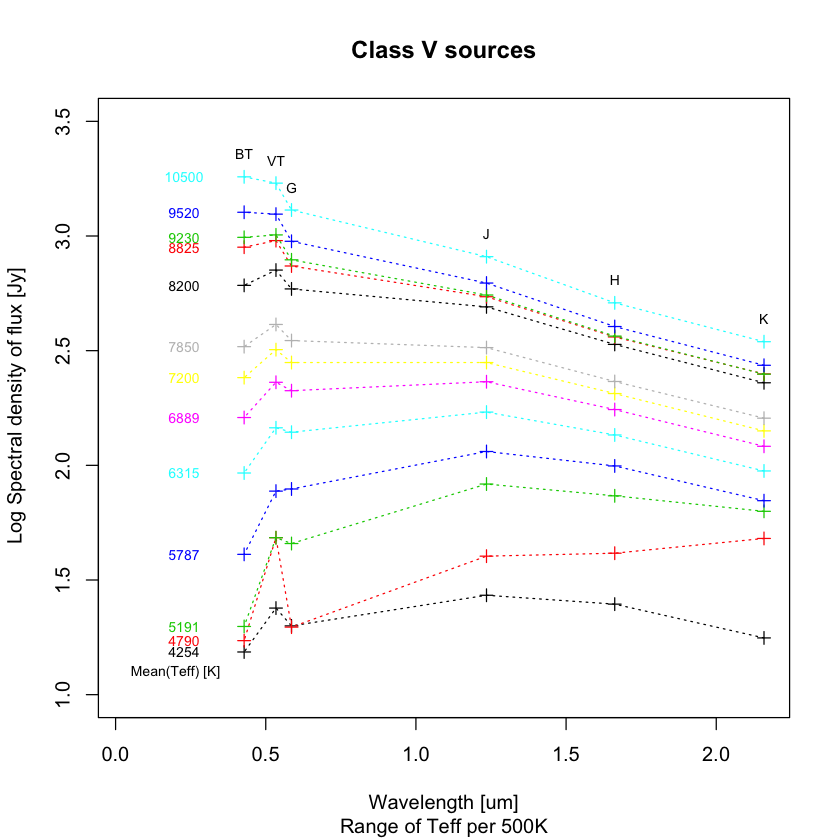

In [115]:
# Plot of the absolute SED based on flux

icut <-3
Ind_icut <- which(Cut_Teff_num==icut)

xmin <- BT_Leff*unit
xmax <- K_Leff*unit
plot(rep(K_Leff,length(Ind_icut)),Dat_5.0$Hmag[Ind_icut ]-Dat_5.0$Kmag[Ind_icut ], xlim=c(xmin-0.4,xmax), cex=0,pch=3,
     ylim=c(1,3.5), xlab="Wavelength [um]", ylab=" Log Spectral density of flux [Jy]",
     main="Class V sources", sub="Range of Teff per 500K")
text(0.2,1.1,labels="Mean(Teff) [K]",cex=0.7)

icol <-0
for (icut in 1:max(Cut_Teff_num, na.rm=TRUE)){
Ind_icut <- which(Cut_Teff_num==icut)

icol <- icol+1
Log_Flux <-log10(c(mean(Kabs_5.0_Fl[Ind_icut ],na.rm=TRUE), mean(Habs_5.0_Fl[Ind_icut ],na.rm=TRUE),
                   mean(Jabs_5.0_Fl[Ind_icut ],na.rm=TRUE),mean(Gabs_5.0_Fl[Ind_icut ],na.rm=TRUE),
                   mean(Vabs_5.0_Fl[Ind_icut ],na.rm=TRUE),mean(Babs_5.0_Fl[Ind_icut ],na.rm=TRUE)))
points(Leff,Log_Flux, col=icol,type="l", lty=3)
points(K_Leff*unit,log10(mean(Kabs_5.0_Fl[Ind_icut ],na.rm=TRUE)), pch=3, col=icol)
points(H_Leff*unit,log10(mean(Habs_5.0_Fl[Ind_icut ],na.rm=TRUE)),  pch=3, col=icol)
points(J_Leff*unit,log10(mean(Jabs_5.0_Fl[Ind_icut ],na.rm=TRUE)),  pch=3, col=icol)
points(G_Leff*unit,log10(mean(Gabs_5.0_Fl[Ind_icut ],na.rm=TRUE)),  pch=3, col=icol)
points(VT_Leff*unit,log10(mean(Vabs_5.0_Fl[Ind_icut ],na.rm=TRUE)),  pch=3, col=icol)
points(BT_Leff*unit,log10(mean(Babs_5.0_Fl[Ind_icut ],na.rm=TRUE)),  pch=3, col=icol)
text(Leff[6]-0.2,Log_Flux[6],labels=paste(floor(mean(Dat_5.0$Teff[Ind_icut], na.rm=TRUE))),cex=0.7, col=icol)
#text(Leff[6]+0.2,Log_Flux[6],labels=paste(floor(mean(Dat_5.0$Teff[Ind_icut], na.rm=TRUE))),cex=0.7, col=icol)
}

text(Leff,Log_Flux+0.1,labels=c("K","H","J","G","VT","BT"),cex=0.7, col=1)



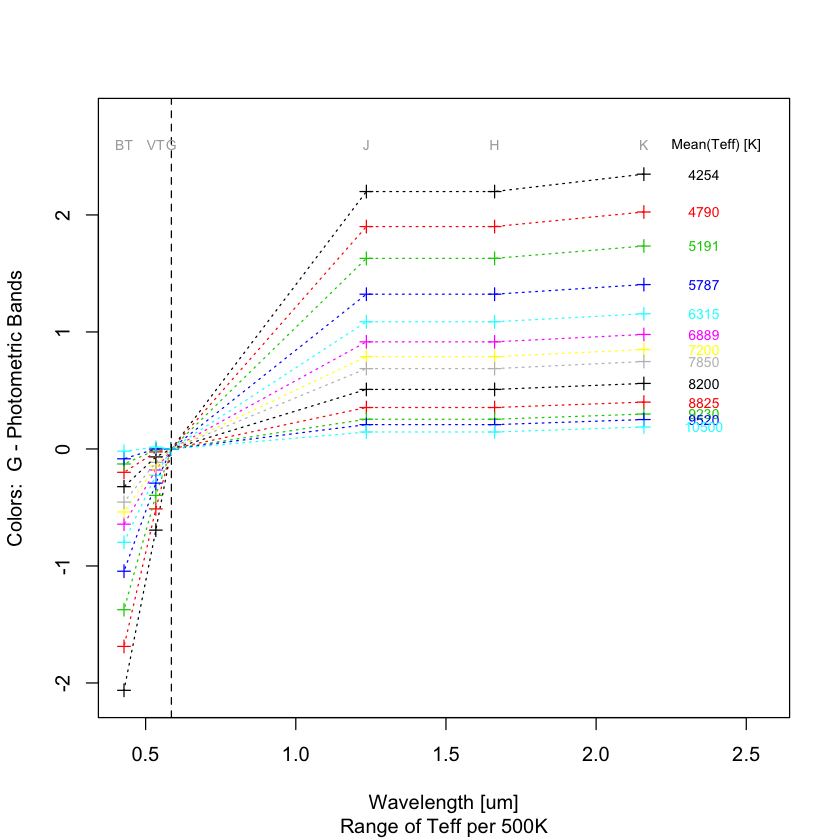

In [155]:
# Plot of the relative SED based on G magnitude reference

icut <-3
Ind_icut <- which(Cut_Teff_num==icut)

Diff_G_mag_vec <-matrix(nrow=max(Cut_Teff_num, na.rm=TRUE),ncol=6)

xmin <- BT_Leff*unit
xmax <- K_Leff*unit
plot(rep(K_Leff,length(Ind_icut)),Dat_5.0$Hmag[Ind_icut ]-Dat_5.0$Kmag[Ind_icut ], xlim=c(xmin,xmax+0.4), 
     cex=0,pch=3,ylim=c(-2.1,2.8), xlab="Wavelength [um]", ylab="Colors:  G - Photometric Bands", sub="Range of Teff per 500K")
text(2.4,2.6,labels="Mean(Teff) [K]",cex=0.7)

icol <-0

for (icut in 1:max(Cut_Teff_num, na.rm=TRUE)){
Ind_icut <- which(Cut_Teff_num==icut)
icol <- icol+1

diff_G_K_mean <-mean(Dat_5.0$X.Gmag.[Ind_icut ]-Dat_5.0$Kmag[Ind_icut ],na.rm=TRUE)
diff_G_H_mean <-mean(Dat_5.0$X.Gmag.[Ind_icut ]-Dat_5.0$Hmag[Ind_icut ],na.rm=TRUE)
diff_G_J_mean <-mean(Dat_5.0$X.Gmag.[Ind_icut ]-Dat_5.0$Hmag[Ind_icut ],na.rm=TRUE)
diff_G_V_mean <-mean(Dat_5.0$X.Gmag.[Ind_icut ]-Dat_5.0$VTmag[Ind_icut ],na.rm=TRUE)
diff_G_B_mean <-mean(Dat_5.0$X.Gmag.[Ind_icut ]-Dat_5.0$BTmag[Ind_icut ],na.rm=TRUE)

Diff_G_mag <- c(diff_G_K_mean,diff_G_H_mean,diff_G_J_mean,0,diff_G_V_mean,diff_G_B_mean)
Diff_G_mag_vec[icut,] <- Diff_G_mag
    
points(Leff,Diff_G_mag, col=icol,type="l", lty=3)
points(Leff,Diff_G_mag, col=icol,type="p", lty=3, pch=3)
text(Leff[1]+0.2,Diff_G_mag[1],labels=paste(floor(mean(Dat_5.0$Teff[Ind_icut], na.rm=TRUE))),cex=0.7, col=icol)
}
abline(v=G_Leff*unit, lty=2)
#text(Leff,Diff_G_mag+0.1,labels=c("K","H","J","G","VT","BT"),cex=0.7, col=1)
text(Leff,2.6,labels=c("K","H","J","G","VT","BT"),cex=0.7, col="dark gray")



## 

In [202]:
# 

test <- vector(length=max(Cut_Teff_num, na.rm=TRUE))
Temp_5.0 <- vector(length=length(Dat_5.0$Teff))
Temp_5.0_cut <- vector(length=length(Dat_5.0$Teff))

for (ind in 1:length(Dat_5.0$Teff)){   
    #if (Dat_5.0$Teff[ind] >=4000 & Dat_5.0$Teff[ind] <=10500 ){
diff_G_K <-Dat_5.0$X.Gmag.[ind ]-Dat_5.0$Kmag[ind ]
diff_G_H <-Dat_5.0$X.Gmag.[ind ]-Dat_5.0$Hmag[ind ]
diff_G_J <-Dat_5.0$X.Gmag.[ind ]-Dat_5.0$Hmag[ind ]
diff_G_V <-Dat_5.0$X.Gmag.[ind ]-Dat_5.0$VTmag[ind ]
diff_G_B<-Dat_5.0$X.Gmag.[ind ]-Dat_5.0$BTmag[ind ]
    Diff_G_mag <- c(diff_G_K,diff_G_H,diff_G_J,0,diff_G_V,diff_G_B)
for (icut in 1:max(Cut_Teff_num, na.rm=TRUE)){
    test[icut] <-sum( (Diff_G_mag - Diff_G_mag_vec[icut,] )^2 )}
   Temp_5.0_cut[ind] <- NA
     Temp_5.0[ind] <- NA
    if (length(which(test==min(test))) >0){
Temp_5.0[ind] <-Mean_cut_Teff[which(test==min(test, na.rm=TRUE))]
    Temp_5.0_cut[ind] <-which(test==min(test, na.rm=TRUE))
#        }
}}

In [203]:
testind <-is.na(Temp_5.0)
length(testind)

[1] 19998

In [231]:
ks.test(Dat_5.0$Teff[which ( Dat_5.0$Teff >=4000 & Dat_5.0$Teff <=10500 )],
        Temp_5.0[which ( Dat_5.0$Teff >=4000 & Dat_5.0$Teff <=10500 )])

and.test(Dat_5.0$Teff[which ( Dat_5.0$Teff >=4000 & Dat_5.0$Teff <=10500 )],
        Temp_5.0[which ( Dat_5.0$Teff >=4000 & Dat_5.0$Teff <=10500 )])


summary(Temp_5.0[which ( Dat_5.0$Teff >=4000 & Dat_5.0$Teff <=10500 )])
summary(Dat_5.0$Teff[which ( Dat_5.0$Teff >=4000 & Dat_5.0$Teff <=10500 )])

Warning message in ks.test(Dat_5.0$Teff[which(Dat_5.0$Teff >= 4000 & Dat_5.0$Teff <= :
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  Dat_5.0$Teff[which(Dat_5.0$Teff >= 4000 & Dat_5.0$Teff <= 10500)] and Temp_5.0[which(Dat_5.0$Teff >= 4000 & Dat_5.0$Teff <= 10500)]
D = 0.20583, p-value < 2.2e-16
alternative hypothesis: two-sided


ERROR: Error in and.test(Dat_5.0$Teff[which(Dat_5.0$Teff >= 4000 & Dat_5.0$Teff <= : could not find function "and.test"


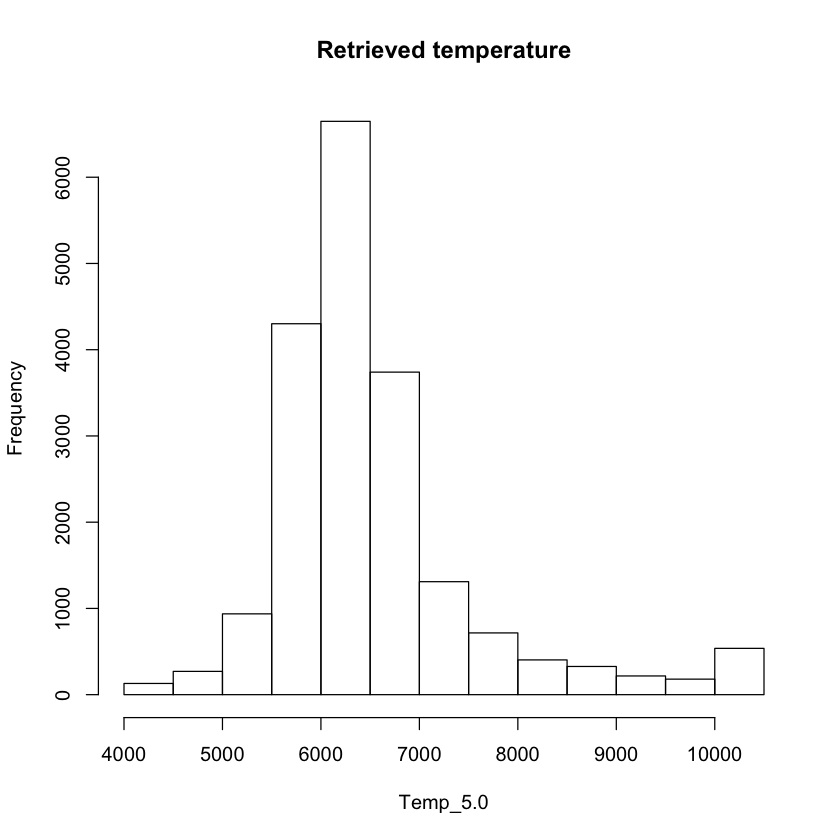

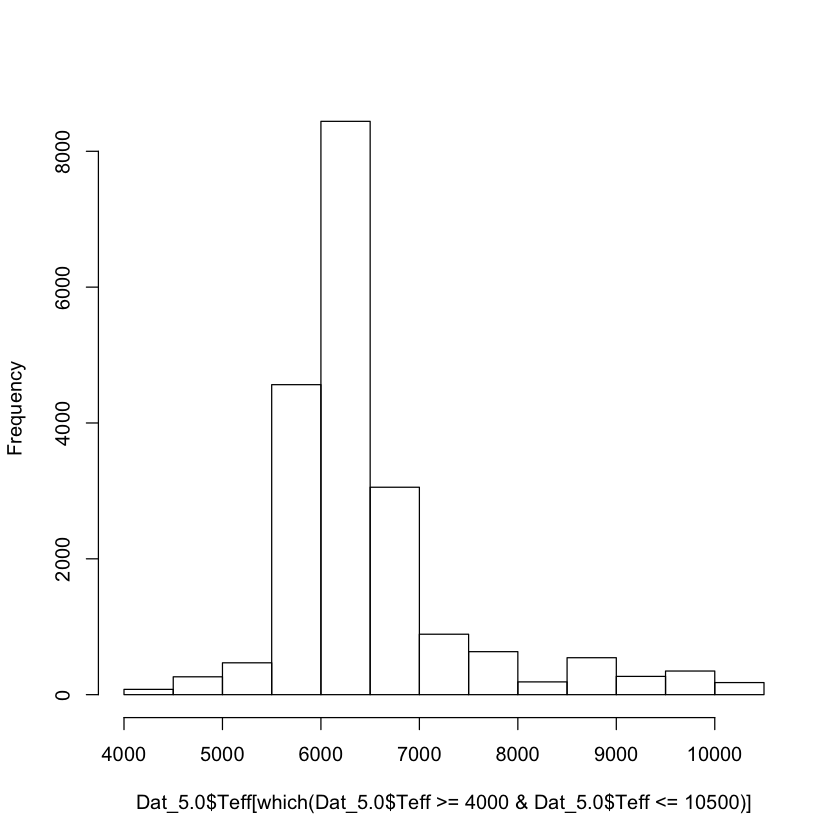

In [204]:
hist(Temp_5.0, main="Retrieved temperature")
hist(Dat_5.0$Teff[which ( Dat_5.0$Teff >=4000 & Dat_5.0$Teff <=10500 )], main="")


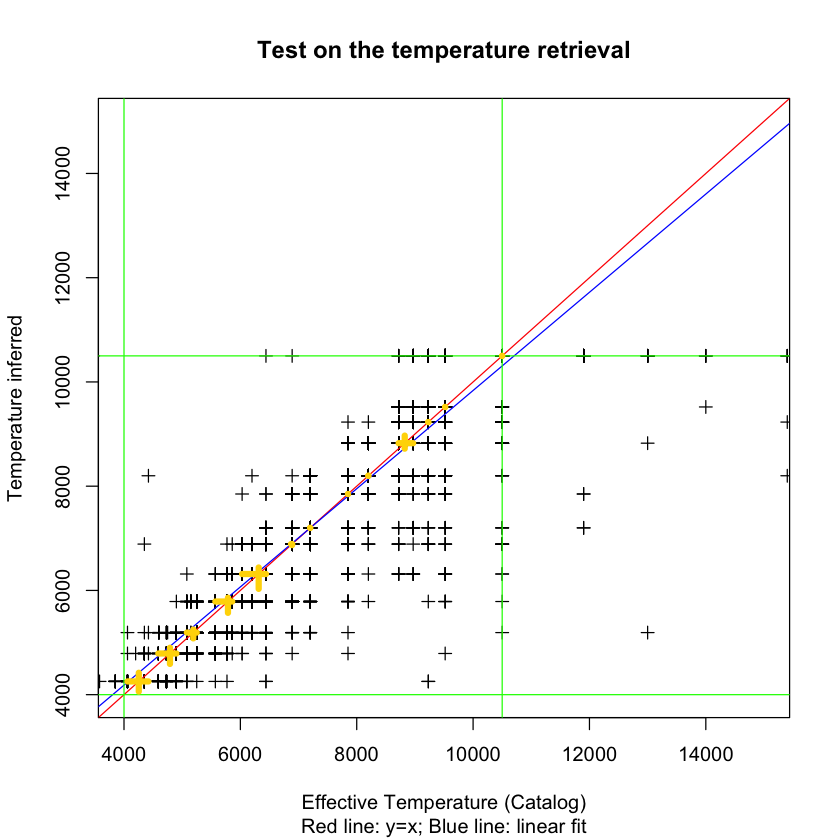

In [225]:
plot(Dat_5.0$Teff,Temp_5.0, pch=3, xlab="Effective Temperature (Catalog)", ylab="Temperature inferred", 
     sub="Red line: y=x; Blue line: linear fit", main="Test on the temperature retrieval", xlim=c(4000,15000),
     ylim=c(4000,15000))
abline(a=0,b=1, col="red")
testlm <-lm(Temp_5.0~Dat_5.0$Teff)
abline(testlm , col="blue")
abline(v=4000, col="green")
abline(v=10500, col="green")
abline(h=4000, col="green")
abline(h=10500, col="green")
for (icut in 1:max(Cut_Teff_num, na.rm=TRUE)){
    segments(Mean_cut_Teff[icut],Min_cut_Teff[icut],Mean_cut_Teff[icut],Max_cut_Teff[icut], col="gold",lw=5)
    segments(Min_cut_Teff[icut],Mean_cut_Teff[icut],Max_cut_Teff[icut],Mean_cut_Teff[icut], col="gold",lw=5)

    #Mean_cut_Teff[icut];Min_cut_Teff[ind];Mean_cut_Teff[ind];Max_cut_Teff[ind]
    }

In [ ]:
length()

In [227]:
for (icut in 1:max(Cut_Teff_num, na.rm=TRUE)){
    #segments(Mean_cut_Teff[icut],Min_cut_Teff[icut],Mean_cut_Teff[icut],Max_cut_Teff[], col="orange")
    print(icut)
    print(Nb_cut_Teff[icut] )
    print(Mean_cut_Teff[icut])#;Min_cut_Teff[icut];Mean_cut_Teff[icut];Max_cut_Teff[icut]
print(Min_cut_Teff[icut])
    print(Max_cut_Teff[icut])
    print("--")
    }

[1] 1
[1] 78
[1] 4254
[1] 4060
[1] 4420
[1] "--"
[1] 2
[1] 263
[1] 4790
[1] 4590
[1] 4900
[1] "--"
[1] 3
[1] 469
[1] 5191
[1] 5080
[1] 5250
[1] "--"
[1] 4
[1] 4564
[1] 5787
[1] 5570
[1] 5860
[1] "--"
[1] 5
[1] 8441
[1] 6315
[1] 6030
[1] 6440
[1] "--"
[1] 6
[1] 3054
[1] 6889
[1] 6870
[1] 6890
[1] "--"
[1] 7
[1] 890
[1] 7200
[1] 7200
[1] 7200
[1] "--"
[1] 8
[1] 633
[1] 7850
[1] 7850
[1] 7850
[1] "--"
[1] 9
[1] 188
[1] 8200
[1] 8200
[1] 8200
[1] "--"
[1] 10
[1] 544
[1] 8825
[1] 8720
[1] 8970
[1] "--"
[1] 11
[1] 269
[1] 9230
[1] 9230
[1] 9230
[1] "--"
[1] 12
[1] 348
[1] 9520
[1] 9520
[1] 9520
[1] "--"
[1] 13
[1] 178
[1] 10500
[1] 10500
[1] 10500
[1] "--"
